# Plotting correlations
---

### Importing packages

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import float32, uint32

//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Importing aggregate data and restructuring for analysis

In [3]:
df2 = pd.read_csv("pickups_agg.csv")
df2["Time"] = pd.to_datetime(df2["Time"].tolist()).to_pydatetime()
df2.head()

,Unnamed: 0,Unnamed: 0.1,month,Time,speed,gust,Visibility,temp,dewpoint,PCP01,...,trip_dist,fare_amt,extra,mta_tax,tip_amt,tolls_amt,improvement_surcharge,Total_amt,Count,Season
0,0,0,1,2015-01-01 06:51:00,14,0,0,29,13,0,...,4.313138,15.109200,0.061412,0.494653,1.330267,0.355826,0.161778,17.647417,6546,Winter
1,1,1,1,2015-01-01 17:51:00,23,30,0,38,9,0,...,2.959722,11.911843,0.116177,0.498171,1.122882,0.290001,0.169145,14.236807,16406,Winter
2,2,2,1,2015-01-02 07:51:00,13,0,0,36,23,0,...,3.471115,12.546591,0.000201,0.495921,1.402077,0.478378,0.151805,15.220199,7478,Winter
3,3,3,1,2015-01-02 10:51:00,15,0,0,37,19,0,...,2.913936,11.734713,0.000456,0.497788,1.115561,0.343395,0.163640,13.988944,14241,Winter
4,4,4,1,2015-01-02 18:51:00,14,24,0,44,16,0,...,2.655752,11.676959,0.971276,0.498749,1.278437,0.228958,0.158763,14.952851,21585,Winter


In [5]:
del df2["Unnamed: 0"]

In [6]:
trip_fields = ['passenger_count','trip_dist', 'fare_amt', 'extra', 'mta_tax', 'tip_amt','tolls_amt', 'improvement_surcharge','Total_amt']
for field in trip_fields:
    df2[field] = df2[field].div(df2["Count"])

In [7]:
def season(x):
	winter1 = datetime(2015,12,22,0,0)
	nye = datetime(2015,12,31,23,59)
	nyd = datetime(2015,1,1,0,0)
	winter2 = datetime(2015,3,19,23,59)
	spring1 = datetime(2015,3,20,0,0)
	spring2 = datetime(2015,6,20,23,59)
	summer1 = datetime(2015,6,21,0,0)
	summer2 = datetime(2015,9,21,23,59)
	autumn1 = datetime(2015,9,22,0,0)
	autumn2 = datetime(2015,12,21,23,59)
	if (winter1 <= x <= nye) or (nyd <= x <= winter2):
		season = 'Winter'
	elif spring1 <= x <= spring2:
		season = 'Spring'
	elif summer1 <= x <= summer2:
		season = 'Summer'
	elif autumn1 <= x <= autumn2:
		season = 'Autumn'
	return season

In [8]:
df2["Season"] = df2["Time"].apply(season)

In [10]:
rain = df2[df2["PCP01"]>0][df2["Total_amt"]<40]

//anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [11]:
len(rain)

580

In [12]:
color_pal = ["#2b83ba","#fdae61","#abdda4","#d7191c"]
sns.set_palette(color_pal)


In [13]:
rain= rain[rain["PCP01"]<1.0]
rain= rain[rain["trip_dist"]<10.0]

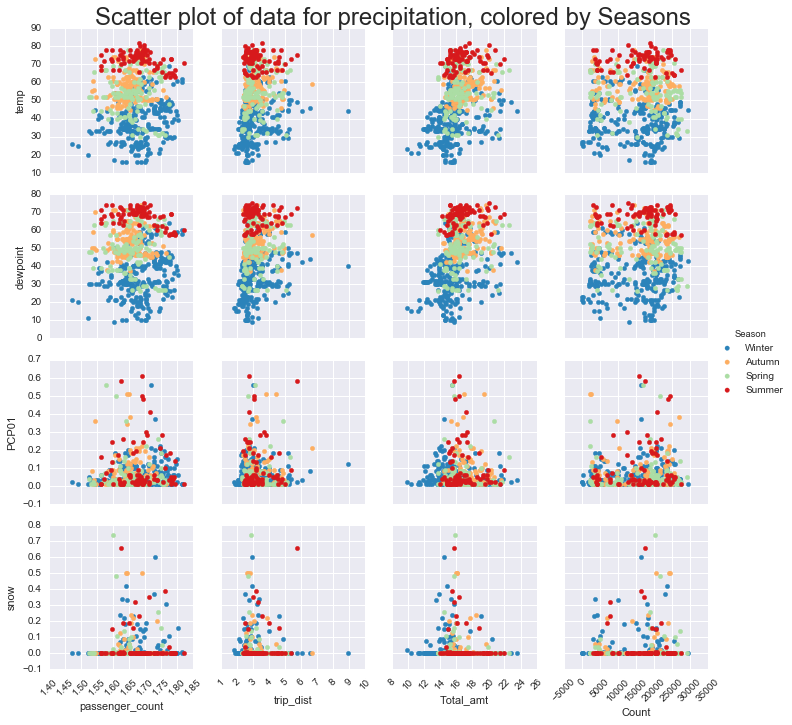

In [24]:
g = sns.PairGrid(rain,x_vars=['passenger_count','trip_dist','Total_amt','Count'],
                              
                              y_vars=['temp','dewpoint','PCP01','snow'],hue = "Season")
                              
                              
g = g.map(plt.scatter)
g = g.add_legend()
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Scatter plot of data for precipitation, colored by Seasons', fontsize = 24)
#sns.set_context(context="poster",font_scale=1.5)
#sns.set_style("ticks",{"xtick.major.size":5,"ytick.major.size":5})
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
g.savefig("scatter_season.png")

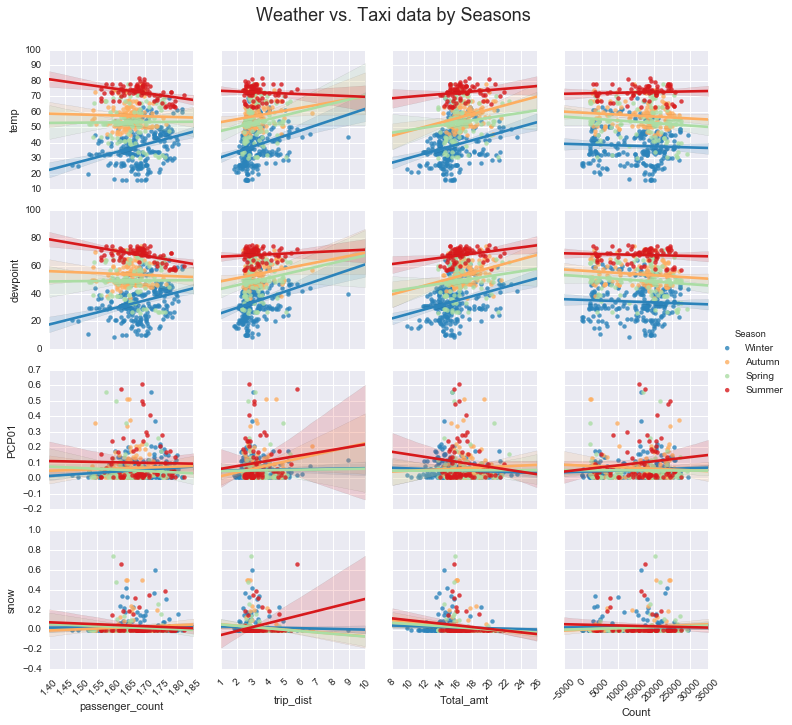

In [47]:
g = sns.PairGrid(rain,x_vars=['passenger_count','trip_dist','Total_amt','Count'],
                              
                              y_vars=['temp','dewpoint','PCP01','snow'],hue = "Season")


g.map(sns.regplot);
sns.color_palette("Paired")
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()  
g.set(alpha=0.1)  
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Weather vs. Taxi data by Seasons', fontsize = 18)
plt.savefig("2.png")

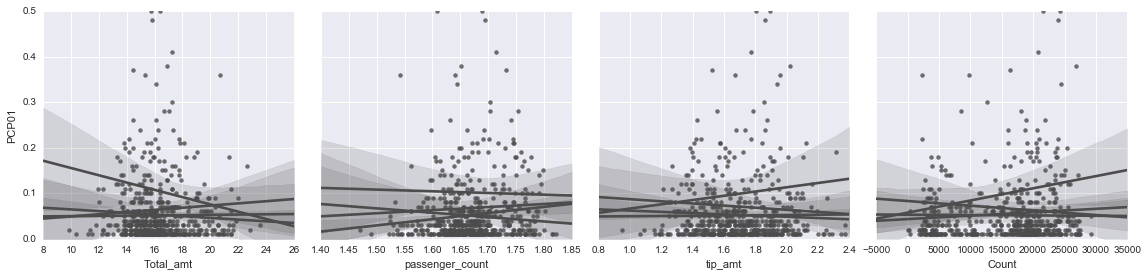

In [16]:
g = sns.PairGrid(rain, y_vars=["PCP01"], x_vars=["Total_amt", "passenger_count","tip_amt","Count"], size=4,hue = "Season")
g.map(sns.regplot, color=".3")
g.set(ylim=(0, 0.5))
plt.ylabel="Rainfall"



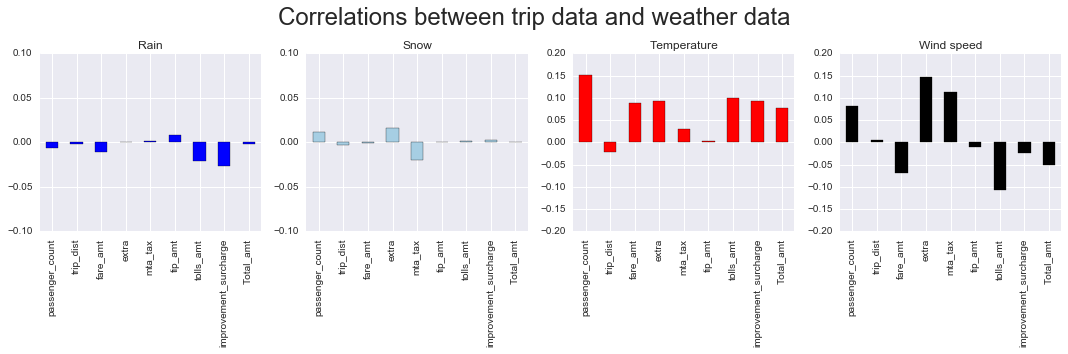

In [45]:
corr = df2.corr()

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
corr_rain = corr["PCP01"][trip_fields]
corr_rain.plot(kind='bar',rot=90)
plt.title("Rain")
plt.ylim(-0.1,0.1)

plt.subplot(1,4,2)
corr_snow = corr["snow"][trip_fields]
corr_snow.plot(kind='bar',rot=90,colormap="Paired")
plt.title("Snow")
plt.ylim(-0.1,0.1)

plt.subplot(1,4,3)
corr_rain = corr["temp"][trip_fields]
corr_rain.plot(kind='bar',rot=90,colormap="prism")
plt.title("Temperature")
plt.ylim(-0.2,0.2)

plt.subplot(1,4,4)
corr_snow = corr["speed"][trip_fields]
corr_snow.plot(kind='bar',rot=90,colormap="copper")
plt.title("Wind speed")
plt.ylim(-0.2,0.2)
plt.tight_layout()

plt.suptitle("Correlations between trip data and weather data",fontsize = 24)
plt.subplots_adjust(top=0.85)
#plt.xticks(rotation=70)
plt.show()
#plt.suptitle("Correlations between taxi trip fields and weather fields",fontsize=20)
plt.savefig("corr_bar_2.png")